In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Introduction

•  Completeness — if the statement is true then a prover can convince a verifier

•  Soundness — a cheating prover can not convince a verifier of a false statement

•  Zero-knowledge — the interaction only reveals if a statement is true and nothing else

## The Medium of a Proof

Let us consider polynomials, which can be visualized as a curve on a graph, shaped by a
mathematical equation

In [3]:
#We choose a function 

#f(x) = (x**3) - 6*(x**2) + (11 * x) - 6 

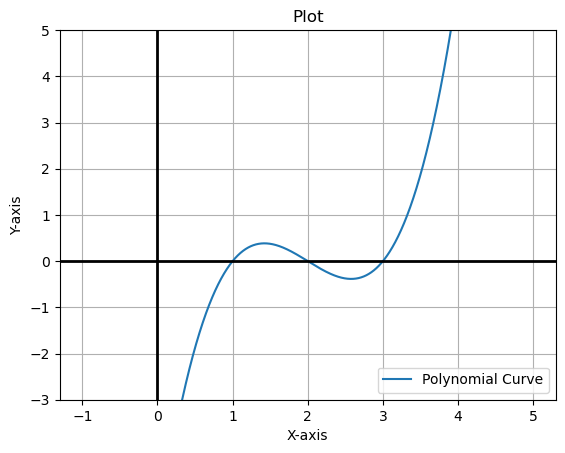

In [4]:

x = np.linspace(-1,5,10000)
y = (x**3) - 6*(x**2) + (11 * x) - 6 

# Plot the polynomial using Seaborn
sns.lineplot(x, y, label='Polynomial Curve')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot')
plt.ylim(-3,5)


# Show legend
plt.legend()

# Show the plot
plt.grid()
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)


plt.show()


it is impossible to find two
non-equal polynomials, which share a consecutive chunk of a curve


Fundamental Theorem of Algebra tells us that a degree d polynomial can have at most d solutions, and therefore two different function of the same degree will have at most d shared points

Hence we can conclude that evaluation of any polynomial at an arbitrary point is akin to the representation of its unique identity. Only at most 3 choices will have an equal evaluation on two different polynomials of the same degree

If a prover claims to know some polynomial, that the verifier also knows, they can follow a simple protocol to verify the statement: 

•  Verifier chooses a random value for x and evaluates his polynomial locally

• Verifier gives x to the prover and asks to evaluate the polynomial in question
•  Prover evaluates his polynomial at x and gives the result to the verifier

•  Verifier checks if the local result is equal to the prover’s result, and if so then the statement
is proven with a high confidence



##### Note: 

If we, for example, consider an integer range of x from 1 to 10^77, the number of points where
evaluations are different is 1077 − d. Henceforth the probability that x accidentally “hits” any of the d shared points is equal to d/10^77 , which is considered negligible

### Test Case

In [25]:
import random
def prover_test():
    #We do more tests than the number of dimensions so there is no mistake
    for i in range(0,4): 
        x = random.randint(1,100000)

        #Enter prover function:
        yProver = (x**3) - 6*(x**2) + (11 * x) - 6 
        #Enter verifier function:
        yVerifier = (x**3) - 6*(x**2) + (11 * x) - 4
        if yProver != yVerifier :
            return False
    return True 


def prover_test_in_pdf():
  
   
    #There is a negligible chance to land on one of the three points
    x = random.randint(1,100000000000000)  

    #Enter prover function:
    yProver = (x**3) - 6*(x**2) + (11 * x) - 6 
    #Enter verifier function:
    yVerifier = (x**3) - 8*(x**2) + (11 * x) - 6
    if yProver != yVerifier :
        return False
    return True 

In [27]:
#We test each function for any instances of proving without the correct function

for i in range(0,1000):
    if prover_test() ==True :
        print("Error")
        
for i in range(0,1000):
    if prover_test_in_pdf() ==True :
        print("Error")

___

## 3 Non-Interactive Zero-Knowledge of a Polynomial
### 3.1 Proving Knowledge of a Polynomia

We start with a problem of proving the knowledge of a polynomial and make our way to a
generic approach. We will discover many other properties of polynomials along the way.

The discussion so far has focused on a weak notion of a proof, where parties have to trust each
other because there are no measures yet to enforce the rules of the protocol. For example,
the prover is not required to know a polynomial, and he can use any other means available to
him to come up with a correct result. Moreover, if the amplitude of the verifier’s polynomial
evaluations is not large, let us say 10, the verifier can guess a number, and there is a non-negligible probability that it will be accepted. We have to address such weakness of the protocol

Let's explore what it means to know a polynomial...

If one stated that they know a polynomial of degree 1, what that really means is that they know the coefficients c0 and c1 of said polynomial.

c1*x^1+c2*x^2

### 3.2 Factorization

The Fundamental Theorem of Algebra states that any polynomial can be factored into linear polynomials (i.e., a degree 1 polynomials representing a line), as long it is solvable. Consequently,
we can represent any valid polynomial as a product of its factors:

(x − a0)(x − a1)...(x − an) = 0

Also, if any of these factors is zero then the whole equation is zero, henceforth all the a-s are
the only solutions

Factorisation allows us to easily see the roots (where y=0) of the polynomial, these will be the solutions to our new proving technique. Knowing the roots will mean knowing the polynomial.

This way we can prove knowledge of such a polynomial without disclosing the polynomial itself.



- Poly: p(x)
- Target (prover's claim that he knows a poly of degree d knowing d-1 roots: t(x) 
- Arbitrary poly (last root) : h(x) 

p(x)= t(x) * h(x)

A natural way to find h(x) is through the division h(x) = p(x)/t(x)
. If the prover cannot find
such h(x) that means that p(x) does not have the necessary cofactors t(x), in which case the
polynomials division will have a remainder

___ 

Using our polynomial identity check protocol we can compare polynomials p(x) and t(x)·h(x):


• Verifier samples a random value r, calculates t = t(r) (i.e., evaluates) and gives r to the
prover

• Prover calculates h(x) = p(x)/t(x)
and evaluates p(r) and h(r); the resulting values p, h are
provided to the verifier

• Verifier then checks that p = t · h, if so those polynomials are equal, meaning that p(x)
has t(x) as a cofactor.

### Test case

In [101]:

def verifier_canon_tcalc():
    #y_p=x^3-3*x^2+2*x 
    #y_t=(x-1)(x-2)

    #Verifier samples a random value 
    sample = random.randint(0,10000)
    print("sample value: "+str(sample))

    #Calculates t = t(sample)
    y_t=(sample-1)*(sample-2)
    print("t(sample) ="+str(y_t))
   
    #returns sample value to the prover
    return [sample, y_t]

In [108]:
def prover_canon_calc(x):
   
    #Prover calculates h(x)= p(x)/t(x) = x 
    # y_h=(x^3-3*x^2+2*x)/((x-1)*(x-2))
    
    #And now evaluates p(sample) and h(sample) and provides them to the verifier
    y_p=x**3-4*x**2+2*x
    y_h=(x**3-4*x**2+2*x)/((x-1)*(x-2))
    
    print("y_p = "+str(y_p))
    print("y_h = "+str(y_h))
    
    return [y_p,y_h]
    

In [106]:
def verifier_canon_check(y_p, y_h, y_t):
    #Verifier checks that p=t*h
    if y_p == y_t * y_h :
        return True
    else:
        return False 

In [107]:
t_values = verifier_canon_tcalc()
ph_values = prover_canon_calc(t_values[0])
verifier_canon_check(ph_values[0],ph_values[1],t_values[1])

sample value: 6161
t(sample) =37939440
y_p = 233706931919
y_h = 6159.999512881582


True

###### Note: Now we can check a polynomial for specific properties without learning the polynomial itself, so this already gives us some form of zero-knowledge and succinctness. Nonetheless, there are multiple issues with this construction

• Prover may not know the claimed polynomial p(x) at all. He can calculate evaluation
t = t(r), select a random number h and set p = t· h, which will be accepted by the verifier
as valid, since equation holds.

• Because prover knows the random point x = r, he can construct any polynomial which has
one shared point at r with t(r) · h(r).

• In the original statement, prover claims to know a polynomial of a particular degree, in
the current protocol there is no enforcement of degree. Hence prover can cheat by using a
polynomial of higher degree which also satisfies the cofactors check.


We will address all of the issues in the following sections.
____

### 3.3 Obscure Evaluation

Two first issues of remark 3.1 are possible because values are presented at raw, prover knows r
and t(r). It would be ideal if those values would be given as a black box, so one cannot temper
with the protocol, but still able to compute operations on those obscure values. Something
similar to the hash function, such that when computed it is hard to go back to the original
input

#### 3.3.1 Homomorphic Encryption

Homomorphic encryption allows us to encrypt a value and apply arithmetic operations on such encryption. 

We chose a base natural number g and exponentiate g to the power of the value we want to encrypt.

In [128]:
def homo_encrypt(x, base):
    return base**x

def homo_multiply(x, mult):
    return x**mult

def homo_add(x, add, base):
    return x*(base**add)

def homo_substract(x, substract, base):
    return x/(base**substract)

def homo_decrypt(x, base):
    secret=0
    while x>1:
        x = x/base
        secret = secret +1
    return secret

In [138]:
homo_encrypt(3,5) # We encrypt 3 at base 5 

125

In [139]:
homo_multiply(125,2) # We multiply the encrypted 3 by 2 (3*2=6)

15625

In [140]:
homo_add(15625,2,5) # We add 2 (6+2=8)

390625

In [141]:
homo_substract(390625,4,5) # We substract 4 (8-4=4)

625.0

In [142]:
homo_decrypt(625,5) # We decrypt the number and get our secret value

4

However, since the base 5 is public, it is quite easy to go back to the secret number, dividing
encrypted by 5 until the result is 1. The number of steps is the secret number.

____
#### 3.3.2 Modular Arithmetic

That is where the modular arithmetic comes into play. The idea of modular arithmetic is
following: instead of having an infinite set of numbers we declare that we select only first n
natural numbers, i.e., 0, 1, . . . , n − 1, to work with, and if any given integer falls out of this
range, we “wrap” it around.

Moreover, we can perform arithmetic operations, and the result will always be in the scope of
n numbers. We will use the notation “mod n” for now on to denote the range of numbers.


Furthermore, the most important property is that the order of operations does not matter,
e.g., we can perform all operations first and then apply modulo or apply modulo after every
operation.


So why on earth is that helpful? It turns out that if we use modulo arithmetic, having a
result of operation it is non-trivial to go back to the original numbers because many different
combinations will have the same result

Without the modular arithmetic, the size of the result gives a clue to its solution. This piece
of information is hidden otherwise, while common arithmetic properties are preserved.
____ 

#### 3.3.3 Strong Homomorphic Encryption

Let's go back to the homomorphic encryption and use modular arithmetic

In [153]:
def mod_homo_encrypt(x, base, modulo):
    return (base**x)%modulo

def mod_homo_multiply(x, mult, modulo):
    return (x**mult) #To-Do 

def mod_homo_add(x, add, base, modulo):
    return x*(base**add)

def mod_homo_substract(x, substract, base, modulo):
    return x/(base**substract)

def mod_homo_decrypt(x, base, modulo):
    secret=0
    while x>1:
        x = x/base
        secret = secret +1
    return secret

In [151]:
# We get the same result for different hidden numbers
print(mod_homo_encrypt(5,5,7))
print(mod_homo_encrypt(11,5,7))


3
3


This is where it gets hard to find the exponent. In fact, if modulo is sufficiently large, it
becomes infeasible to do so, and a good portion of the modern-day cryptography is based on
the “hardness” of this problem.


##### Note : There are limitations to this homomorphic encryption scheme while we can multiply an encrypted value by an unencrypted value, we cannot multiply (and divide) two encrypted values, as well as we cannot exponentiate an encrypted value. While unfortunate from the first impression, these properties will turn out to be the cornerstone of zk-SNARK

#### 3.3.4 Encrypted Polynomial

Armed with such tools, we can now evaluate a polynomial with an encrypted random value of
x and modify the zero-knowledge protocol accordingly.

This is quite a powerful mechanism, and because of the homomorphic
property, the encrypted evaluations of the same polynomials are always the same in encrypted
space.
We can now update the previous version of the protocol, for a polynomial of degree d:


•  Verifier
– samples a random value s, i.e., secret
– calculates encryptions of s for all powers i in 0, 1, ..., d, i.e.: E(s
i
) = g
s
i
– evaluates unencrypted target polynomial with s: t(s)
– encrypted powers of s are provided to the prover: E(s
0
), E(s
1
), ..., E(s
d
)


•  Prover
– calculates polynomial h(x) = p(x)
t(x)
– using encrypted powers g
s
0
, gs
1
, . . . , gs
d
and coefficients c0, c1, . . . , cn evaluates
E (p(s)) = g
p(s) =

g
s
d
cd
· · · 
g
s
1
c1
·

g
s
0
c0
and similarly E (h(s)) = g
h(s)
– the resulting g
p and g
h are provided to the verifier


•  Verifier
– The last step for the verifier is to checks that p = t(s) · h in encrypted space:
g
p =

g
h
t(s)
⇒ g
p = g
t(s)·h


Note: because the prover does not know anything about s, it makes it hard to come up with
non-legitimate but still matching evaluations.


While in such protocol the prover’s agility is limited he still can use any other means to forge a
proof without actually using the provided encryptions of powers of s, for example, if the prover
claims to have a satisfactory polynomial using only 2 powers s
3 and s
1
, that is not possible to
verify in the current protocol